## Decision Boundaries in Classification

Decision boundaries are the invisible lines (or surfaces/hyperplanes) that divide the feature space into regions where each region belongs to a specific class. A new data point falls into the class of whichever region it's in.

**Simple analogy**: Imagine a map coloring neighborhoods red or blue. The boundary line separates red from blue areas—points on the red side get classified red, blue side get blue.

#### Linear vs Non-Linear Boundaries

| Model Type | Boundary Shape | Example |
|------------|----------------|---------|
| **Linear** (logistic regression, linear SVM) | Straight line | ✅ Clean separation of two groups |
| **Non-Linear** (KNN, decision trees, neural nets) | Curves, wiggly lines | ✅ Handles complex, overlapping patterns |

Linear models struggle when classes aren't neatly separable by a straight line.


#### predict_proba & Thresholds (KNN Example)

Scikit-learn classifiers give **two outputs**:

```python
# 1. Hard prediction (class label)
y_pred = knn.predict(X_test)  # ['Paid', 'Did not pay', ...]

# 2. Soft prediction (probabilities)
y_proba = knn.predict_proba(X_test)  # [[0.8, 0.2], [0.3, 0.7], ...]
```

**For KNN**: Probabilities = vote proportions from k neighbors.
- 8/10 neighbors "Paid" → 80% probability of "Paid" [0.8, 0.2]

**Default threshold (0.5)**: 
- `P(class=1) > 0.5` → predict class 1 ("Paid")
- `P(class=1) ≤ 0.5` → predict class 0 ("Did not pay") **[ties go to class 0]**

#### Custom Thresholds (Business Decisions)

Your transcript shows raising threshold to 0.8 for "high confidence":

```python
# Custom threshold example
proba_paid = y_proba[:, 1]  # Probability of "Paid" (class 1)
y_pred_custom = (proba_paid > 0.8).astype(int)  # 1 if >80%, else 0
```

**Trade-offs**:
- **High threshold (0.8)**: Fewer false positives (safer loans), more false negatives (miss good borrowers)
- **Low threshold (0.3)**: Fewer false negatives (catch more payers), more false positives (riskier loans)

| Threshold | Who gets "Paid"? | Risk |
|-----------|------------------|------|
| 0.5 (default) | >50% confident | Balanced |
| 0.8 | >80% confident | Conservative |
| 0.3 | >30% confident | Aggressive |

#### Visualizing Boundaries (2D Example)

KNN creates flexible, data-hugging boundaries based on neighbor density. Linear models draw straight lines.

This explains why KNN handles complex patterns better than logistic regression but needs scaling and proper k tuning!

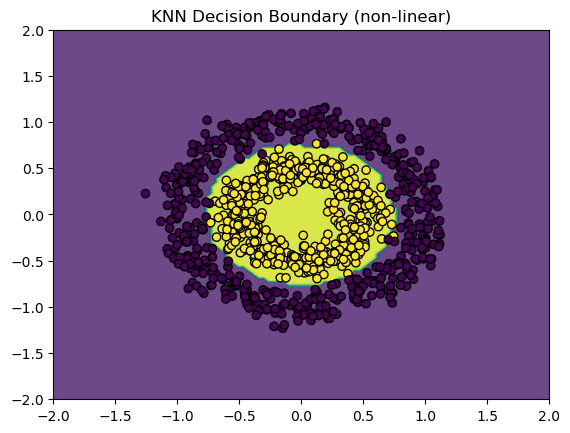

In [4]:
# Quick demo with make_circles (non-linear data)
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=15).fit(X, y)

# Plot decision boundary (wiggly!)
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.title("KNN Decision Boundary (non-linear)")
plt.show()

[1](https://www.giskard.ai/glossary/decision-boundary)
[2](https://www.sapien.io/glossary/definition/decision-boundary)
[3](https://www.deepchecks.com/glossary/decision-boundary/)
[4](https://klu.ai/glossary/decision-boundary)
[5](https://www.lakera.ai/ml-glossary/decision-boundary)
[6](https://en.wikipedia.org/wiki/Decision_boundary)
[7](https://www.geeksforgeeks.org/machine-learning/understanding-decision-boundaries-in-k-nearest-neighbors-knn/)
[8](https://huppenkothen.org/machine-learning-tutorial/05-DecisionBoundaries/index.html)
[9](https://www.geeksforgeeks.org/machine-learning/visualizing-classifier-decision-boundaries/)
[10](https://www.reddit.com/r/statistics/comments/kj2ira/d_understanding_what_exactly_is_a_decision/)